In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ISEAR.csv')

In [3]:
#df.rename(columns= {'joy': 'Emotion', 'On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly': 'Text'},inplace= False)
df.head
df.drop(columns=['Unnamed: 2'],inplace=True)
df.columns= ['Emotion', 'Text']
df.head()

,Emotion,Text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...


In [4]:

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import xgboost
from sklearn import decomposition, ensemble
import pandas, numpy, textblob, string
import re
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

## Data- PreProcessing

### Uppercase to lowercase

In [5]:
df['Text'] = df['Text'].apply(lambda a: " ".join(a.lower()for a in a.split()))

### Removing whitespace characters

In [6]:
df['Text'] = df['Text'].apply(lambda a: " ".join(a.replace('[^\w\s]','') for a in a.split()))

### Removing stop words

In [7]:
stop= stopwords.words('english')
df['Text']= df['Text'].apply(lambda a: " ".join(a for a in a.split() if a not in stop))

### Spelling correction

In [8]:
df['Text']= df['Text'].apply(lambda a: str(TextBlob(a).correct()))

### Stemming

In [9]:
st= PorterStemmer()
df['Text']= df['Text'].apply(lambda a:" ".join([st.stem(word) for word in a.split()]))

In [52]:
df['Emotion'].value_counts()

5    1082
0    1079
2    1076
6    1071
1    1066
3    1049
Name: Emotion, dtype: int64

## Encoding
Converting categorical value to the numerical value. 

In [15]:
object= preprocessing.LabelEncoder()
df['Emotion']= object.fit_transform(df['Emotion'])


In [16]:
df['Emotion'].value_counts()

4    1091
5    1082
0    1079
2    1076
6    1071
1    1066
3    1049
Name: Emotion, dtype: int64

In [17]:
condition= (df['Emotion']==4)
df.drop(df[condition].index,inplace=True)

In [18]:
# object= preprocessing.LabelEncoder()
# df['Emotion']= object.fit_transform(df['Emotion'])


In [19]:
df['Emotion'].value_counts()

5    1091
6    1082
0    1079
2    1076
7    1071
1    1066
3    1049
Name: Emotion, dtype: int64

## Training- Testing Split


In [18]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(df['Text'], df['Emotion'],stratify= df['Emotion'])  

## Conversion from Text to Features using Count Vectorizer method

In [19]:
cv= CountVectorizer()
cv.fit(df['Text'])
cv_xtrain= cv.transform(Xtrain)
cv_xtest= cv.transform(Xtest)

## Text to Features using TF- IDF

In [20]:
tv= TfidfVectorizer()
tv.fit(df['Text'])
tv_xtrain= tv.transform(Xtrain)
tv_xtest= tv.transform(Xtest)

## Building Model

In [21]:
def modelBuild(model_initializer, independent_variables_training, target, independent_variable_test):
    classifier_model= model_initializer.fit(independent_variables_training, target)
    modelPrediction= classifier_model.predict(independent_variable_test)
    return metrics.accuracy_score(modelPrediction, Ytest)

## Logistic Regression


In [22]:
## For Count Vectorizer:

output= modelBuild(linear_model.LogisticRegression(), cv_xtrain, Ytrain, cv_xtest)
print(output)

##For TF-IDF
output= modelBuild(linear_model.LogisticRegression(), tv_xtrain, Ytrain, tv_xtest)
print(output)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5616438356164384
0.5784557907845579


## Support Vector Machine

In [23]:
## For Count Vectorizer:

output= modelBuild(svm.SVC(), cv_xtrain, Ytrain, cv_xtest)
print(output)

##For TF-IDF
output= modelBuild(svm.SVC(), tv_xtrain, Ytrain, tv_xtest)
print(output)


0.539227895392279
0.5722291407222914


## Random Forest

In [24]:
#For Count Vectorizer: 

output= modelBuild(ensemble.RandomForestClassifier(), cv_xtrain, Ytrain, cv_xtest)
print(output)
## For TF-IDF
output= modelBuild(ensemble.RandomForestClassifier(), tv_xtrain, Ytrain, tv_xtest)
print(output)

0.5516811955168119
0.562266500622665


## Multinomial Naive Bayes

In [25]:
#For Count Vectorizer: 
output= modelBuild(naive_bayes.MultinomialNB(), cv_xtrain, Ytrain, cv_xtest)
print(output)

output= modelBuild(naive_bayes.MultinomialNB(),tv_xtrain, Ytrain, tv_xtest)
print(output)

0.5765877957658779
0.5784557907845579


# Summary

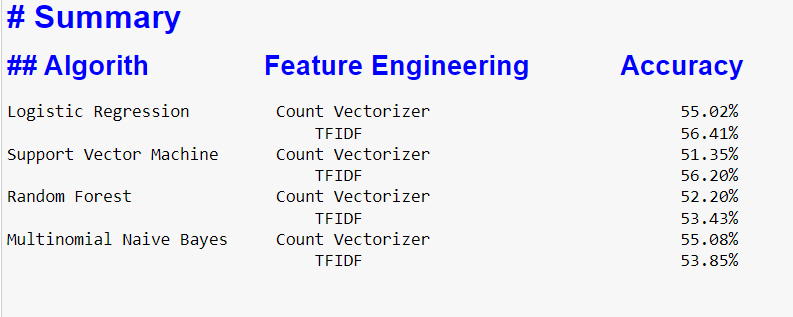

From above, it is clear that Logistic Regression with TFIDF has the highest accuracy, so let's select this for further classification

# Confusion Matrix for LR- TFIDF

In [26]:
classifier= linear_model.LogisticRegression().fit(tv_xtrain, Ytrain)
value_predictions= classifier.predict(tv_xtest)

y_true, y_pred= Ytest, value_predictions
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       270
           1       0.62      0.63      0.63       266
           2       0.71      0.68      0.70       269
           3       0.49      0.44      0.46       262
           5       0.69      0.66      0.68       271
           6       0.48      0.51      0.49       268

    accuracy                           0.58      1606
   macro avg       0.58      0.58      0.58      1606
weighted avg       0.58      0.58      0.58      1606




In [27]:
tweet= pd.read_csv('fifaTweets.csv')

In [28]:
tweet.head()

,Unnamed: 0,text,date
0,0,no bro messi is the best bcz he won fifa the b...,"Jan 18, 2024 · 10:53 PM UTC"
1,1,• Flopped at PSG ❌ • Knocked out of French Cup...,"Jan 16, 2024 · 6:58 PM UTC"
2,2,🤣🤣🤣🤣but fifa the best and bdor are not?🤣🤣…. Cl...,"Jan 18, 2024 · 10:49 PM UTC"
3,3,Reasons why Messi didn’t go to the FIFA The Be...,"Jan 15, 2024 · 9:31 PM UTC"
4,4,Le premier et le seul joueur hors d’Europe à a...,"Jan 17, 2024 · 11:05 PM UTC"


In [31]:
tweet= tweet[['text', 'date']] #Removing unwanted column unnamed: 0

In [32]:
tweet

,text,date
0,no bro messi is the best bcz he won fifa the b...,"Jan 18, 2024 · 10:53 PM UTC"
1,• Flopped at PSG ❌ • Knocked out of French Cup...,"Jan 16, 2024 · 6:58 PM UTC"
2,🤣🤣🤣🤣but fifa the best and bdor are not?🤣🤣…. Cl...,"Jan 18, 2024 · 10:49 PM UTC"
3,Reasons why Messi didn’t go to the FIFA The Be...,"Jan 15, 2024 · 9:31 PM UTC"
4,Le premier et le seul joueur hors d’Europe à a...,"Jan 17, 2024 · 11:05 PM UTC"
...,...,...
995,Lionel Messi G.O.A.T 🐐 ⭐️ Most Ballon d'Or ...,"Jan 15, 2024 · 10:27 PM UTC"
996,💥 Neymar says he did not vote for anyone in th...,"Jan 17, 2024 · 9:09 AM UTC"
997,"What Ballondor 8, What FIFA The Best 8 🥶🥶 The...","Jan 16, 2024 · 9:47 AM UTC"
998,𝟭𝟬 𝗦𝗘𝗣𝗧𝗘𝗠𝗕𝗘𝗥 𝟐𝟎𝟐𝟑 I had a convo with BASSEM re...,"Jan 17, 2024 · 8:49 AM UTC"


In [34]:
#Removing digits from the column of Text
tweet['text']= tweet['text'].str.lstrip('0123456789')

In [38]:
#Lowercasing: 
tweet['text']= tweet['text'].apply(lambda a: " ".join(a.lower() for a in a.split()))

In [39]:
#removing punctuation
tweet['text']= tweet['text'].str.replace('[^\w\s]', '')

C:\Users\user\AppData\Local\Temp\ipykernel_12292\2104329875.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet['text']= tweet['text'].str.replace('[^\w\s]', '')


In [42]:
#removing stopwords
sw= stopwords.words('english')
tweet['text']= tweet['text'].apply(lambda a: " ".join(a for a in a.split() if a not in sw))

In [45]:
tweet.tail()

,text,date
995,lionel messi goat ballon dor awards 8 fifa bes...,"Jan 15, 2024 · 10:27 PM UTC"
996,neymar says vote anyone fifa best awards messi...,"Jan 17, 2024 · 9:09 AM UTC"
997,ballondor 8 fifa best 8 8 idolo knows,"Jan 16, 2024 · 9:47 AM UTC"
998,𝟭𝟬 𝗦𝗘𝗣𝗧𝗘𝗠𝗕𝗘𝗥 𝟐𝟎𝟐𝟑 convo bassem regarding fifa ...,"Jan 17, 2024 · 8:49 AM UTC"
999,record says messi 8 fifa best certain twitter ...,"Jan 17, 2024 · 9:04 AM UTC"


## Predicting the emotions using trained model

In [49]:
Xpredict= tweet['text']
#TF-IDF
predict_tfidf= tv.transform(Xpredict)
tweet['Emotion']= classifier.predict(predict_tfidf)


In [51]:
tweet.tail()

,text,date,Emotion
995,lionel messi goat ballon dor awards 8 fifa bes...,"Jan 15, 2024 · 10:27 PM UTC",1
996,neymar says vote anyone fifa best awards messi...,"Jan 17, 2024 · 9:09 AM UTC",1
997,ballondor 8 fifa best 8 8 idolo knows,"Jan 16, 2024 · 9:47 AM UTC",1
998,𝟭𝟬 𝗦𝗘𝗣𝗧𝗘𝗠𝗕𝗘𝗥 𝟐𝟎𝟐𝟑 convo bassem regarding fifa ...,"Jan 17, 2024 · 8:49 AM UTC",0
999,record says messi 8 fifa best certain twitter ...,"Jan 17, 2024 · 9:04 AM UTC",0


## Prediction using pre-trained model

In [53]:
tweet['sentiment']= tweet['text'].apply(lambda a: TextBlob(a).sentiment[0])
def function(value):
    if value['sentiment']<0:
        return 'Negative'
    if value['sentiment']>0:
        return 'Positive'
    return 'Neutral'

tweet['Sentiment_label']= tweet.apply(lambda a: function(a), axis= 1)

In [56]:
tweet.head(50)

,text,date,Emotion,sentiment,Sentiment_label
0,bro messi best bcz fifa best award,"Jan 18, 2024 · 10:53 PM UTC",1,1.000000,Positive
1,flopped psg knocked french cup ghosted bayern ...,"Jan 16, 2024 · 6:58 PM UTC",5,0.250000,Positive
2,fifa best bdor clown,"Jan 18, 2024 · 10:49 PM UTC",1,1.000000,Positive
3,reasons messi didnt go fifa best ceremony mess...,"Jan 15, 2024 · 9:31 PM UTC",5,0.181970,Positive
4,le premier et le seul joueur hors deurope à av...,"Jan 17, 2024 · 11:05 PM UTC",5,1.000000,Positive
5,ga history 1065 collective trophies ballon dor...,"Jan 15, 2024 · 10:49 PM UTC",1,0.433333,Positive
6,ederson ake puyol dias dani rodri kdb iniesta ...,"Jan 18, 2024 · 10:37 PM UTC",5,0.466667,Positive
7,messi still hasnt posted anything fifa best in...,"Jan 17, 2024 · 10:29 PM UTC",0,0.366667,Positive
8,3 days since messi fifa best award hasnt even ...,"Jan 18, 2024 · 2:38 PM UTC",5,0.350000,Positive
9,factos fc celebrating years ago saying messi w...,"Jan 18, 2024 · 5:09 PM UTC",5,0.525000,Positive


In [60]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.graph_objs import*
from plotly.offline import*

In [63]:
init_notebook_mode(connected=True)
cf.set_config_file(offline= True, world_readable= True, theme= 'white')
Sentiment_df= pd.DataFrame(tweet.Sentiment_label.value_counts().reset_index())
Sentiment_df.columns= ['Sentiment', 'Count']
Sentiment_df= pd.DataFrame(Sentiment_df)
Sentiment_df['Percentage']= 100* Sentiment_df['Count']/Sentiment_df['Count'].sum()
Sentiment_Max= Sentiment_df.iloc[0,0]
Sentiment_percent= str(round(Sentiment_df.iloc[0,2],2))
fig1= Sentiment_df.iplot(kind= 'pie',labels= 'Sentiment', values= 'Count', textinfo= 'label+percent',title='Sentiment Analysis', world_readable= True, asFigure= True)
ply.offline.plot(fig1, filename= "Sentiment")


C:\Users\user\anaconda3\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Sentiment` didn't end with .html. Adding .html to the end of your file.



'Sentiment.html'

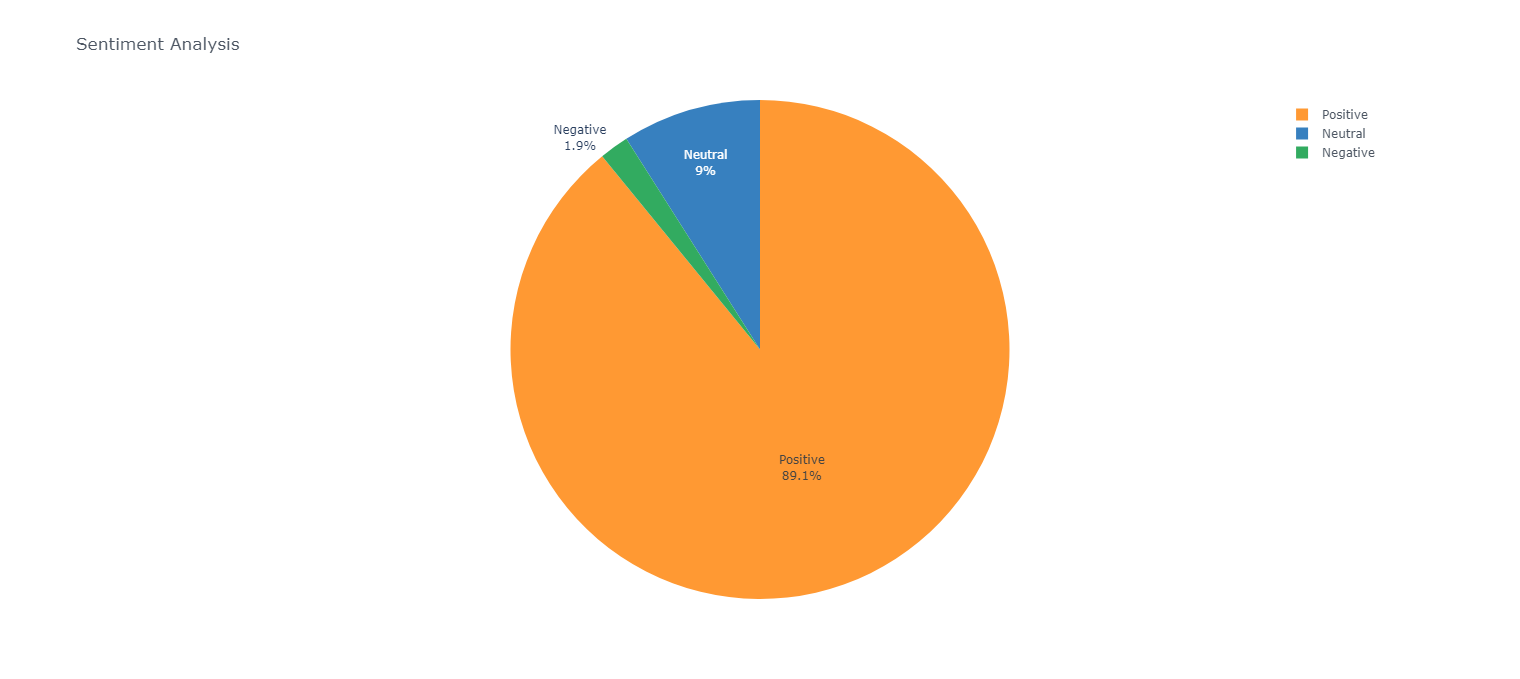

**From the graph, it can be clearly inferred that the tweets regarding messing winning FifaBest Award is taken positively by most of the twitter users. 98.1% are positive about it. While 9% of the twitter users were Neutral. In addition, 1.9% of the people were feeling negative about Messi winning the award.**

## Emotional Analysis 

In [64]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.graph_objs import*
from plotly.offline import*

In [81]:
init_notebook_mode(connected= True)
cf.set_config_file(offline=True, world_readable= True, theme= 'white')
Emotion_df= pd.DataFrame(tweet.Emotion.value_counts().reset_index())
Emotion_df.columns= ['Emotion','Count']
Emotion_df= pd.DataFrame(Emotion_df)
Emotion_df['Percentage']= 100* Emotion_df['Count']/Emotion_df['Count'].sum()
Emotion_Max= Emotion_df.iloc[0,0]
Emotion_percent= str(round(Emotion_df.iloc[0,2],2))
Emotion_percent= str(round(Emotion_df.iloc[0,2],2))
fig= Emotion_df.iplot(kind= 'pie',labels= 'Emotion',values= 'Count', pull=.2, hole=.2, colorscale= 'reds', textposition= 'outside',
                     colors=['red', 'green', 'purple', 'orange', 'blue', 'yellow', 'pink'],
                     textinfo= 'label+percent',title= 'Emotion Analysis', world_readable= True, asFigure= True)
ply.offline.plot(fig,filename="Emotion")

C:\Users\user\anaconda3\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Emotion` didn't end with .html. Adding .html to the end of your file.



'Emotion.html'

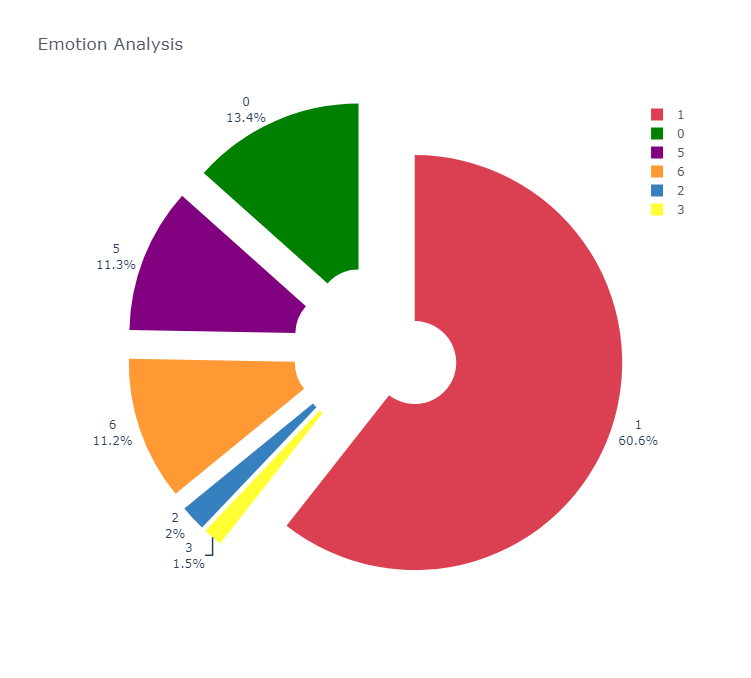

## Emotional and Sentiment Analaysis

C:\Users\user\AppData\Local\Temp\ipykernel_12292\3055242043.py:4: FutureWarning:

`sort_columns` is deprecated and will be removed in a future version.



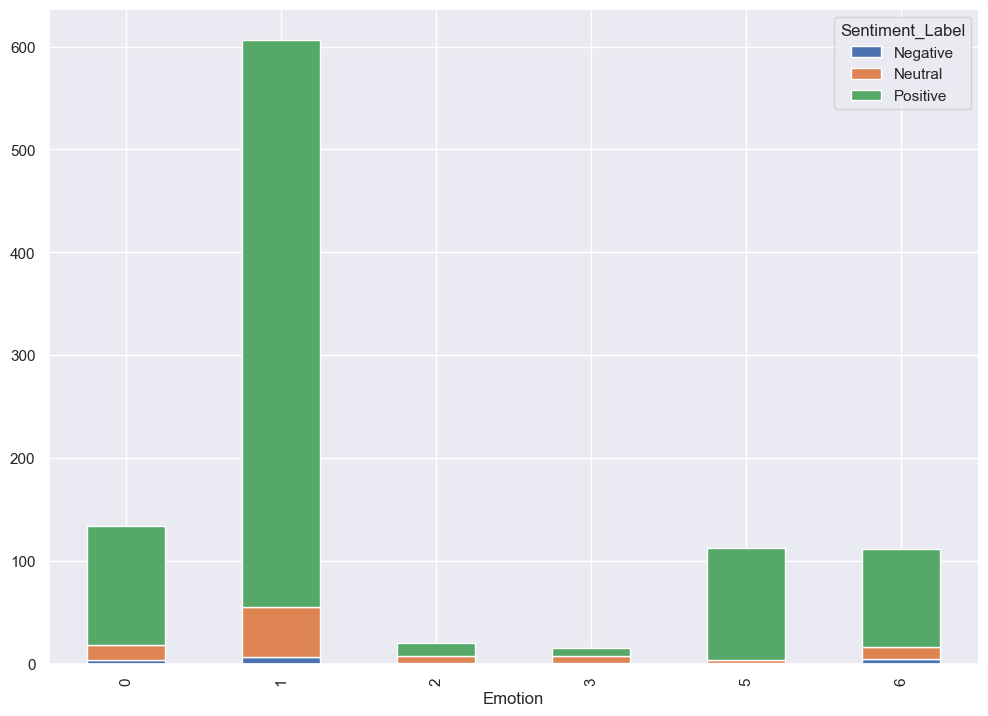

In [69]:
import seaborn as sns
sns.set(rc= {'figure.figsize': (12, 8.5)})
Result= pd.crosstab(tweet.Emotion, tweet.Sentiment_label)
plt= Result.plot.bar(stacked= True, sort_columns= True)
plt.legend(title= 'Sentiment_Label')
plt.figure.savefig('Emotional_Sentiment_Stacked_Visualization.png',dpi= 400)

## Automated Reporting


In [70]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import os

from email.mime.application import MIMEApplication
from email import encoders
import smtplib

In [80]:
def generate_email():
    #add path from where you will access the files, and files names in the files sections
    dir_path = "xxxxxx"
    files = ["xxxxxxxx", ]
    
    # concerned address (you can add multiple address also) using ['', ''] and Password
    company_dict = ['xxxxxxx']
    password = "xxxxxx"
    
    for value in company_dict:
        # From Email address
        From_address = 'xxxxxxx'
        To_address = value

        text = MIMEMultipart()

        text['From'] = "xxxxxx"
        text['To'] = To_address
        text['Subject'] = "Emotion Detection and Sentiment Analysis Report"

        body = (" Hiii \n Greetings of the day,\n We would like to inform you that the data is more about, \n"" Emotion -  " + str(Emotion_Max) + " (" + str(Emotion_percent) + " %).\n"" Sentiment - " + str(Sentiment_Max) + " (" + str(Sentiment_percent) + " %).\n\n"" For the details please go through the attachments below. \n\n\n\n\n Thank You.")

        text.attach(MIMEText(body, 'plain'))


        for k in files: 
            #Adding files to message: 
            file_location = os.path.join(dir_path, k)
            attachment = MIMEApplication(open(file_location, "rb").read(), _subtype="octet-stream")
            attachment.add_header('Content-Disposition','attachment',filename=k)
            text.attach(attachment)

        smtp = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        smtp.login(From_address, password)
        text1 = text.as_string()
        smtp.sendmail(From_address, To_address, text1)
        smtp.quit()
        
        return 'Successfully Sent..!'


          
generate_email ()

FileNotFoundError: [Errno 2] No such file or directory: 'xxxxxx\\xxxxxxxx'